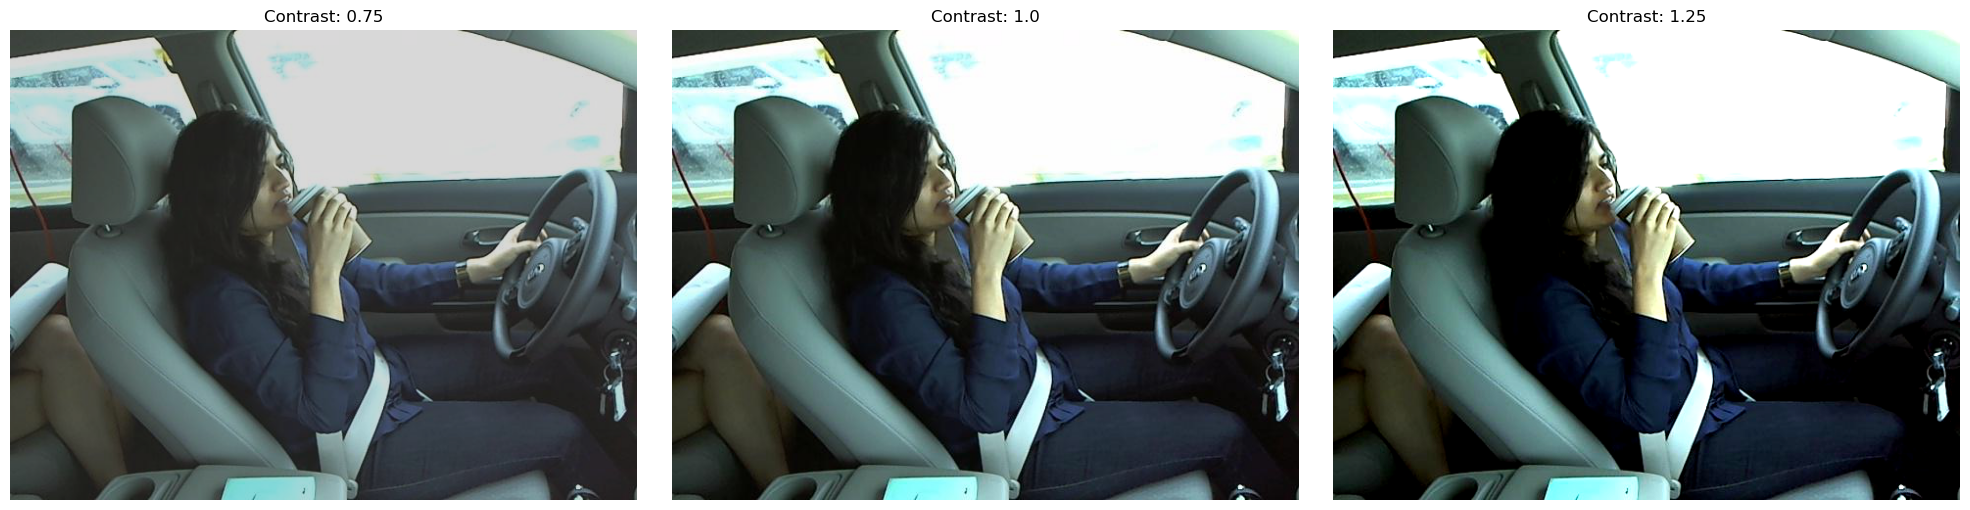

In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Load the image
img_path = 'img_0.jpg'
image = Image.open(img_path)

# Define the contrast values to apply
contrast_values = [0.75, 1.0, 1.25]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(contrast_values), figsize=(20, 5))

# Apply each contrast value and show the images
for ax, contrast in zip(axes, contrast_values):
    enhancer = ImageEnhance.Contrast(image)
    enhanced_image = enhancer.enhance(contrast)
    ax.imshow(enhanced_image)
    ax.set_title(f'Contrast: {contrast}')
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

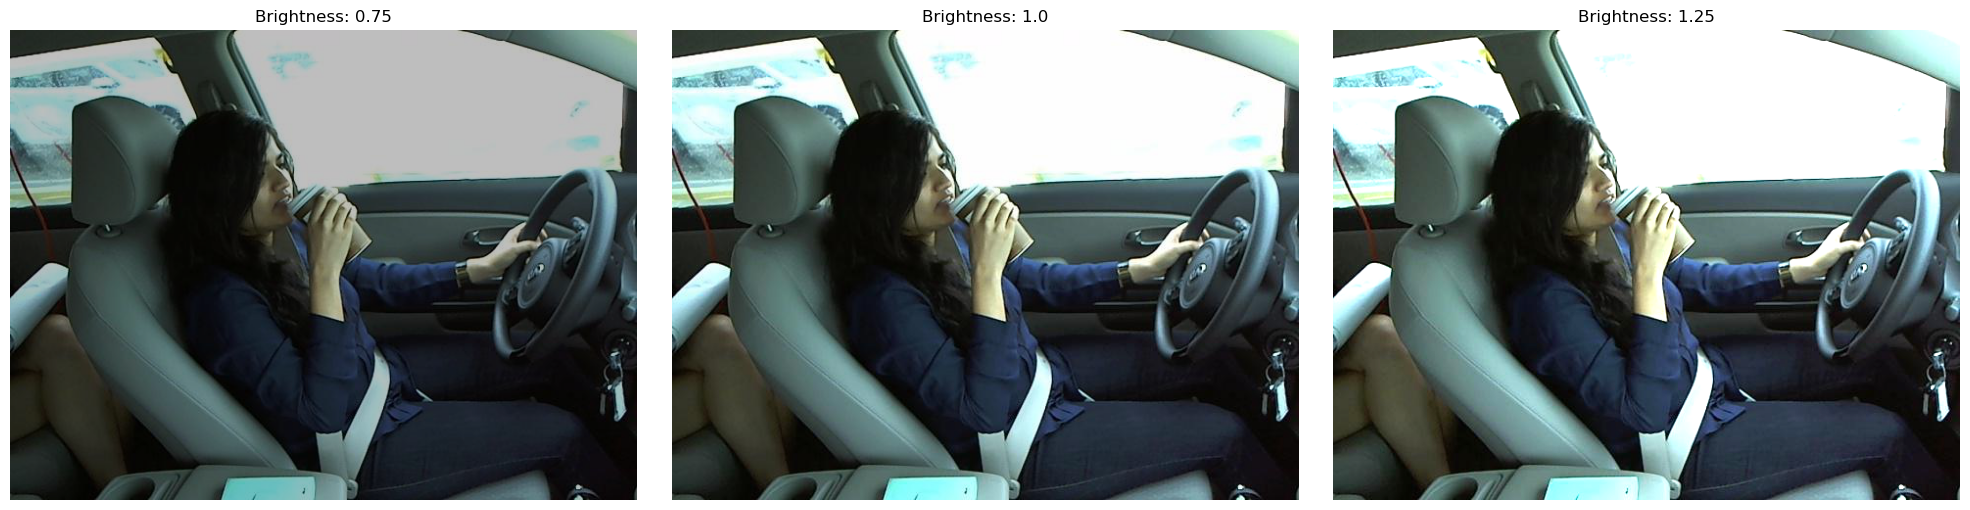

In [2]:
# Define the brightness values to apply
brightness_values = [0.75, 1.0, 1.25]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(brightness_values), figsize=(20, 5))

# Apply each brightness value and show the images
for ax, brightness in zip(axes, brightness_values):
    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness)
    ax.imshow(enhanced_image)
    ax.set_title(f'Brightness: {brightness}')
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

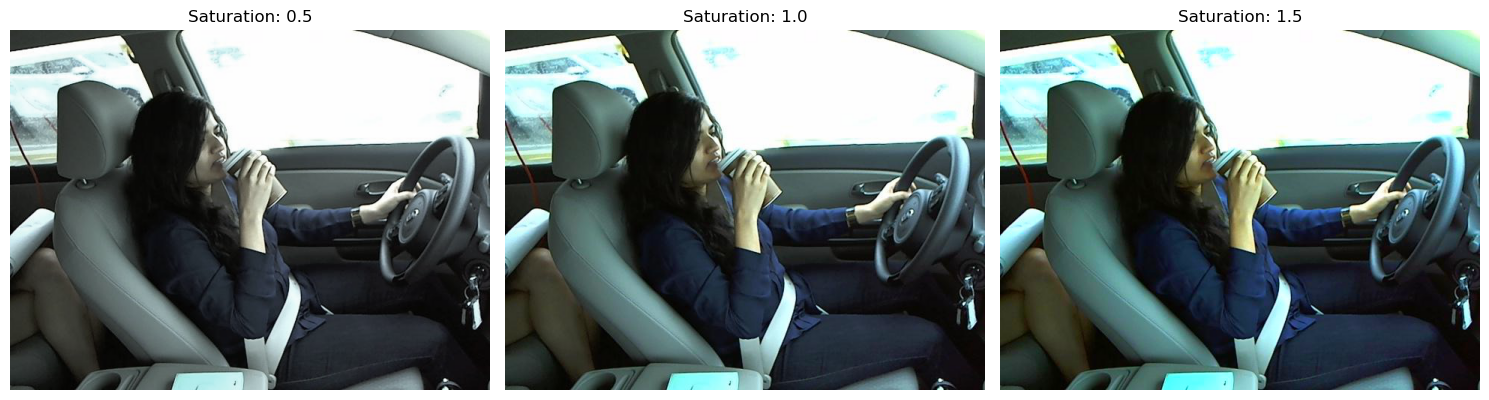

In [3]:
# Define the saturation values to apply
saturation_values = [0.5, 1.0, 1.5]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(saturation_values), figsize=(15, 5))

# Apply each saturation value and show the images
for ax, saturation in zip(axes, saturation_values):
    enhancer = ImageEnhance.Color(image)
    enhanced_image = enhancer.enhance(saturation)
    ax.imshow(enhanced_image)
    ax.set_title(f'Saturation: {saturation}')
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

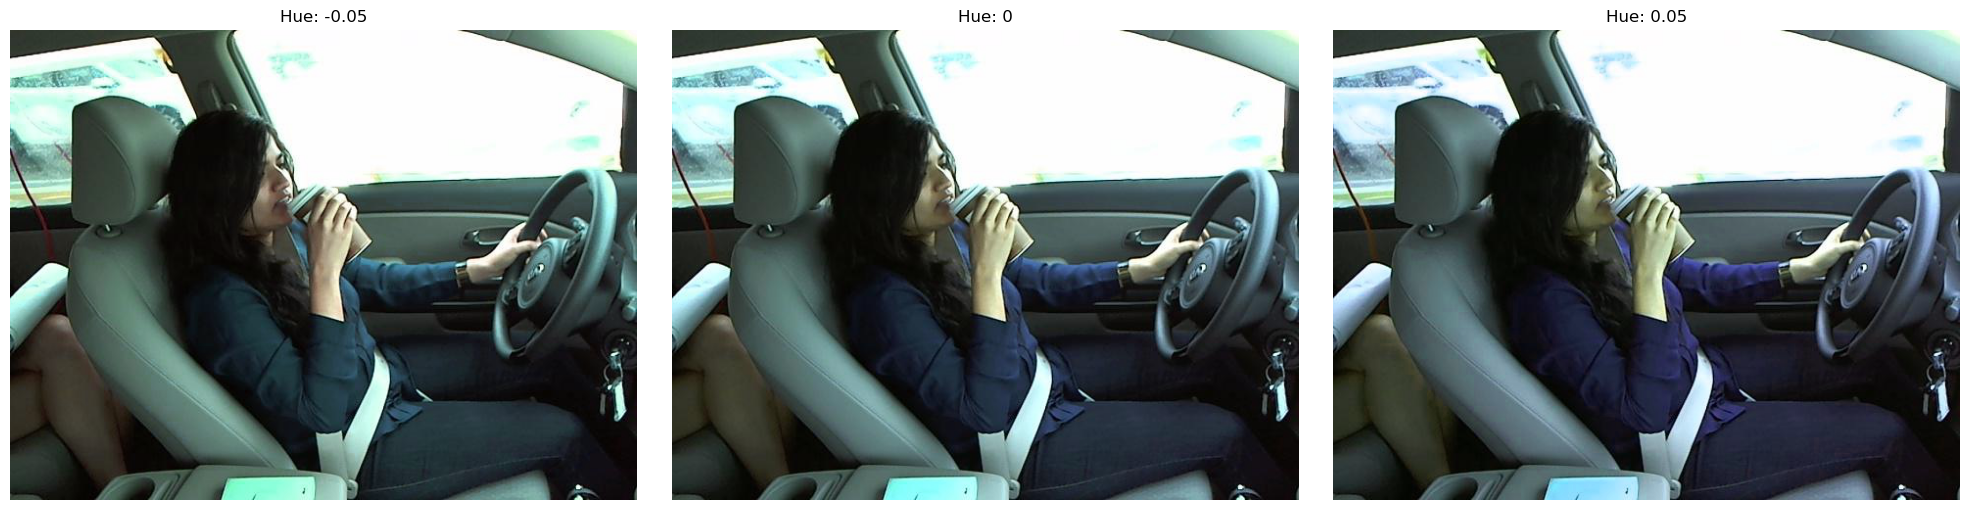

In [4]:
from PIL import Image

def adjust_hue(image, hue_factor):
    # Convert the image to HSV
    hsv_image = image.convert('HSV')
    # Split into individual channels
    h, s, v = hsv_image.split()
    # Adjust the hue channel. Since values in PIL are in [0, 255], we scale the factor accordingly.
    # Note: Adding to the hue effectively rotates the hue channel in the HSV color space.
    h = h.point(lambda i: (i + hue_factor * 255) % 255)
    # Merge the channels back and convert to RGB
    hsv_adjusted = Image.merge('HSV', (h, s, v)).convert('RGB')
    return hsv_adjusted

# Define hue factors to be applied
hue_factors = [-0.05, 0, 0.05]

# Adjust the hue for each factor and display the images
fig, axes = plt.subplots(1, len(hue_factors), figsize=(20, 5))
for ax, factor in zip(axes, hue_factors):
    adjusted_image = adjust_hue(image, factor)
    ax.imshow(adjusted_image)
    ax.set_title(f'Hue: {factor}')
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

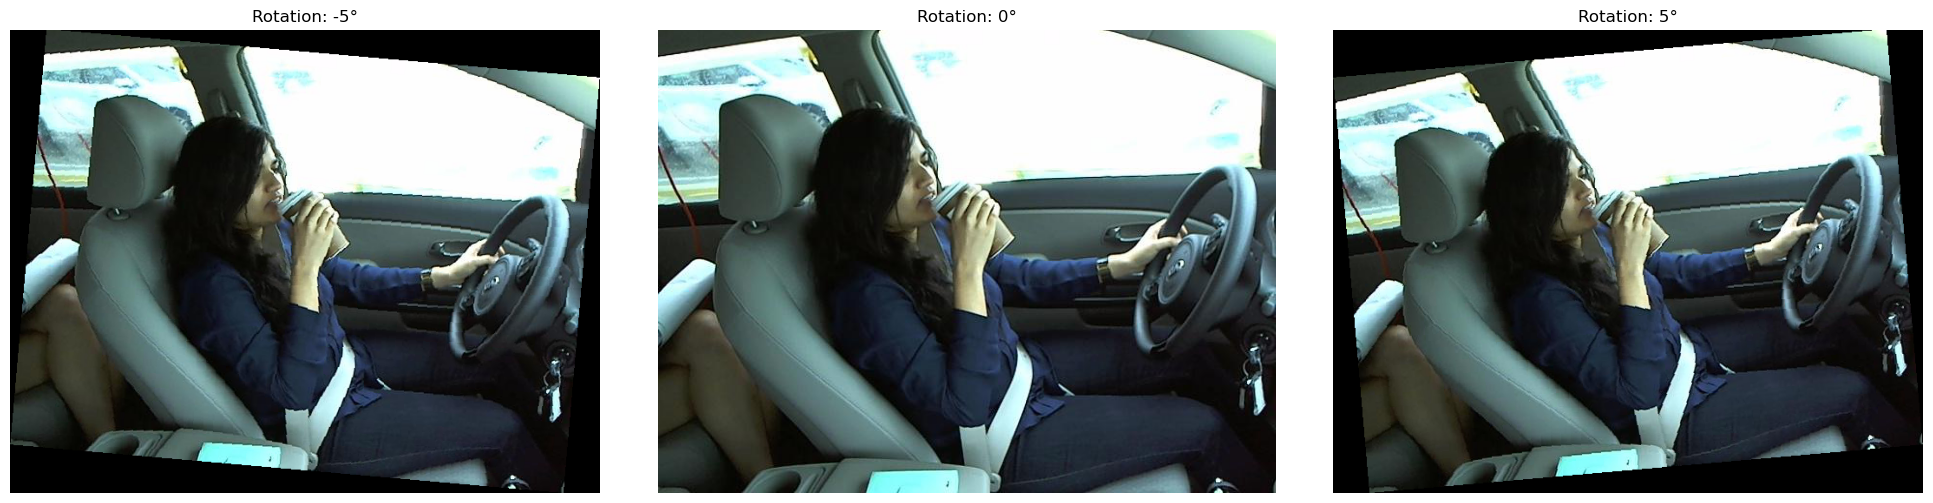

In [5]:
# Define the rotation degrees to apply
rotation_degrees = [-5, 0, 5]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(rotation_degrees), figsize=(20, 5))

# Apply each rotation degree and show the images
for ax, degrees in zip(axes, rotation_degrees):
    # Rotate the image and expand to show the whole rotated image
    rotated_image = image.rotate(degrees, expand=True)
    ax.imshow(rotated_image)
    ax.set_title(f'Rotation: {degrees}°')
    ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

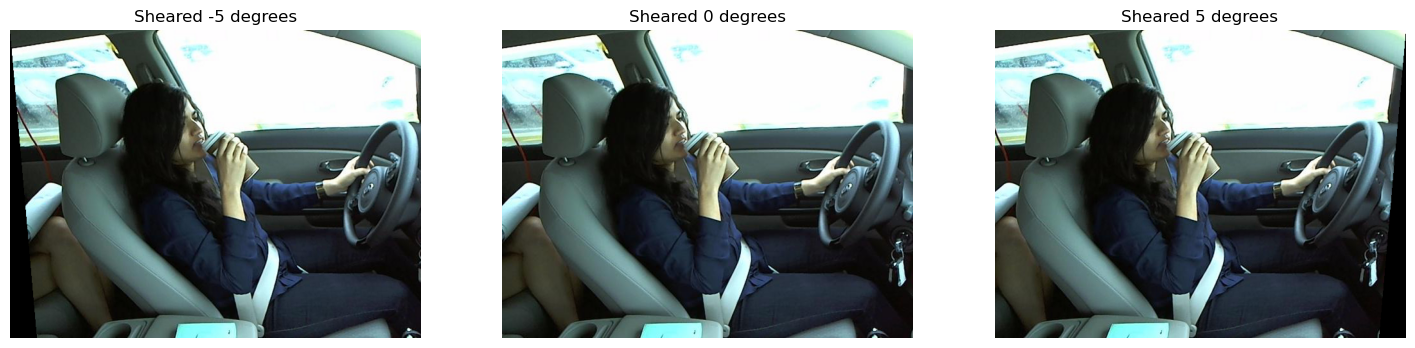

In [6]:
import math
def shear_image(image, degree):
    radians = math.radians(degree)
    tangent = math.tan(radians)
    return image.transform(
        image.size,  # output size
        Image.AFFINE,  # affine transformation
        (1, tangent, 0, 0, 1, 0),  # shear matrix
        Image.BICUBIC  # resampling method
    )

shear_degrees_list = [-5, 0, 5]
sheared_images = [shear_image(image, degree) for degree in shear_degrees_list]

# Display all sheared images
plt.figure(figsize=(18, 9))

for i, img in enumerate(sheared_images, start=1):
    plt.subplot(1, len(sheared_images), i)
    plt.title(f'Sheared {shear_degrees_list[i-1]} degrees')
    plt.imshow(img)
    plt.axis('off')

plt.show()


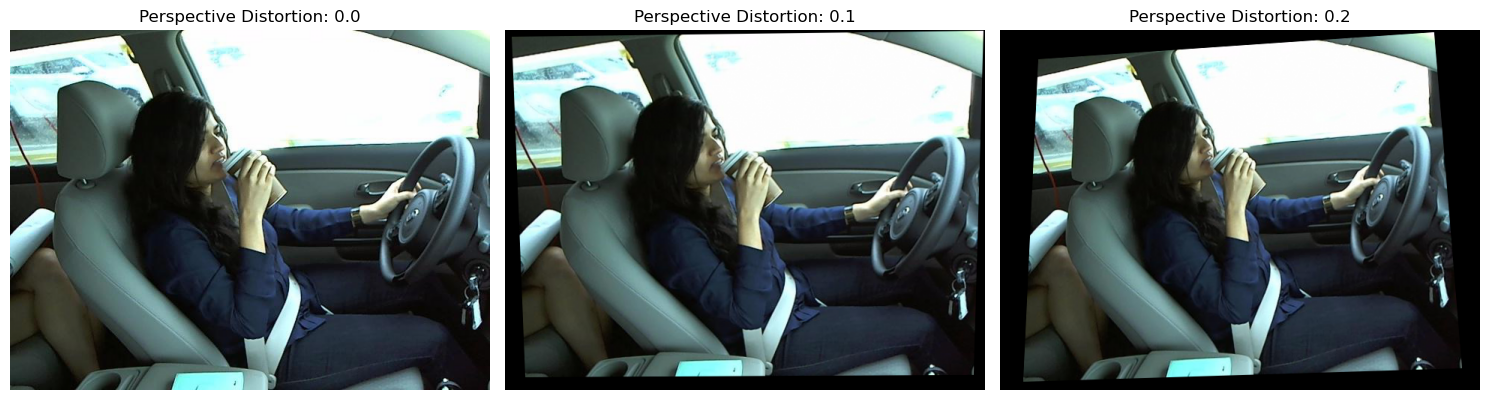

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToTensor, RandomPerspective, InterpolationMode
import torchvision.transforms.functional as F
from torchvision.transforms.functional import to_pil_image

# Example: Loading an image using PIL (make sure you have an image named 'your_image.jpg' or change this to a correct path)

perspective_distortions = [0.0, 0.10, 0.20]

# Apply the RandomPerspective transformation
def apply_random_perspective(image_pil, distortion_scale):
    # Convert PIL image to tensor
    img_tensor = ToTensor()(image_pil)
    
    # Generate perspective coefficients for the given distortion
    startpoints, endpoints = RandomPerspective.get_params(
        width=img_tensor.shape[2], 
        height=img_tensor.shape[1], 
        distortion_scale=distortion_scale
    )

    # Apply RandomPerspective transformation
    transformed_tensor = F.perspective(
        img_tensor,
        startpoints=startpoints,
        endpoints=endpoints,
        interpolation=InterpolationMode.BILINEAR
    )

    # Convert tensor to PIL image
    transformed_image_pil = to_pil_image(transformed_tensor)
    return transformed_image_pil

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Apply random perspective transformation with specified distortion scales and display the images
for ax, distortion_scale in zip(axes, perspective_distortions):
    # Apply the transformation
    transformed_image = apply_random_perspective(image, distortion_scale)
    # Display the image
    ax.imshow(transformed_image)
    ax.set_title(f'Perspective Distortion: {distortion_scale}')
    ax.axis('off')

plt.tight_layout()
plt.show()

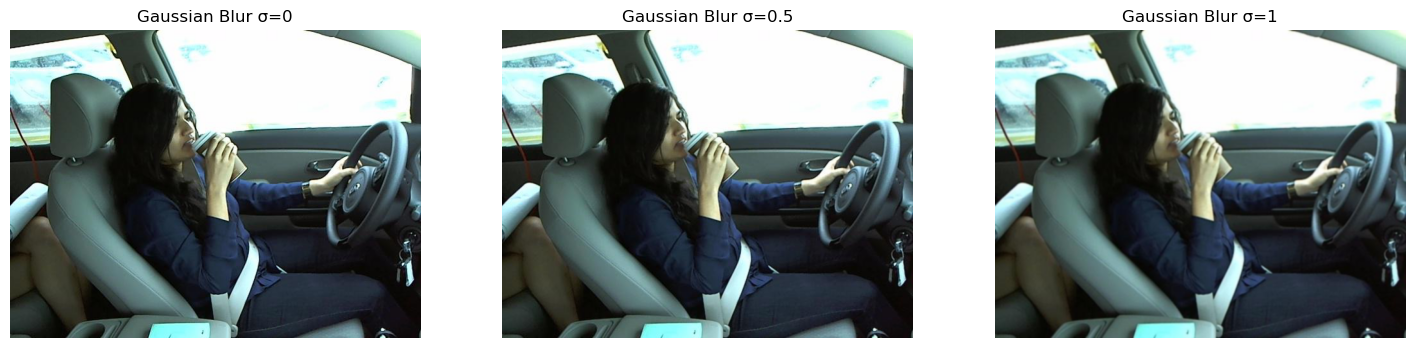

In [9]:
from PIL import ImageFilter
sigma_values = [0, 0.5, 1]
blurred_images = [image.filter(ImageFilter.GaussianBlur(radius=sigma)) for sigma in sigma_values]

# Display all blurred images
plt.figure(figsize=(18, 9))

for i, img in enumerate(blurred_images, start=1):
    plt.subplot(1, len(blurred_images), i)
    plt.title(f'Gaussian Blur σ={sigma_values[i-1]}')
    plt.imshow(img)
    plt.axis('off')

plt.show()